In [1]:
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
import matplotlib.pyplot as plt

In [2]:
#trainData = pd.read_csv("allTrainDescriptors.csv")
#trainTarget = pd.read_csv("trainTarget.csv")
trainData = pd.read_csv("lipTrainDescriptors.csv")
trainData = trainData.loc[:, ['MolWt', 'MolLogP', 'NumRotatableBonds', 'NumHAcceptors', 'NumHDonors']]
trainTarget = pd.read_csv("lipTrainTarget.csv")

In [3]:
testData = pd.read_csv("lipTestDescriptors.csv")
testData = testData.loc[:, ['MolWt', 'MolLogP', 'NumRotatableBonds', 'NumHAcceptors', 'NumHDonors']]
testTarget = pd.read_csv("lipTestTarget.csv")

In [6]:
from sklearn.preprocessing import StandardScaler

frames = [trainData, testData]
allData = pd.concat(frames, ignore_index=True)

frames2 = [trainTarget, testTarget]
allTarget = pd.concat(frames2, ignore_index=True)

allDataVals = StandardScaler().fit_transform(allData.values)
allTargetVals = allTarget.values

trainDataVals = StandardScaler().fit_transform(trainData.values)
trainTargetVals = trainTarget.values

testDataVals = StandardScaler().fit_transform(testData.values)
testTargetVals = testTarget.values

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#principalComponents = pca.fit_transform(trainDataVals)
#principalComponentsTest = pca.fit_transform(testDataVals)
principalComponents = pca.fit_transform(allDataVals)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#principalDfTest = pd.DataFrame(data = principalComponentsTest
             #, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, allTarget], axis = 1)
#finalDfTest = pd.concat([principalDfTest, testTarget], axis = 1)

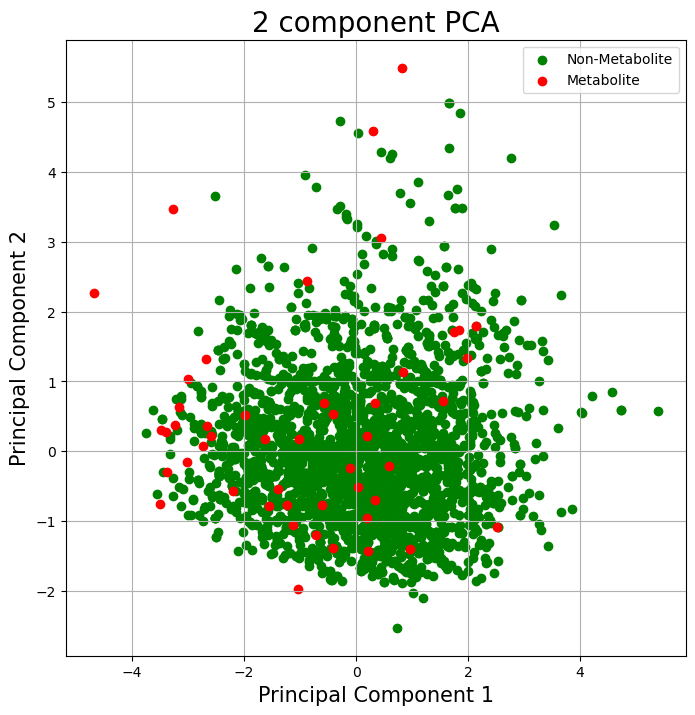

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for i in range(0, len(trainData)):
    if i == 0:
        ax.scatter(finalDf['principal component 1'].values[i], finalDf['principal component 2'].values[i], c = 'g', label = "Non-Metabolite")
    else:
        ax.scatter(finalDf['principal component 1'].values[i], finalDf['principal component 2'].values[i], c = 'g')
for i in range(len(trainData) - 1, len(allData)):
    if i == len(trainData) - 1:
        ax.scatter(finalDf['principal component 1'].values[i], finalDf['principal component 2'].values[i], c = 'r', label = "Metabolite")
    else:
        ax.scatter(finalDf['principal component 1'].values[i], finalDf['principal component 2'].values[i], c = 'r')
plt.legend()
ax.grid()

In [13]:
import numpy as np
np.sum(pca.explained_variance_ratio_)

0.6107582468753285